## Objectif : Prediction du retard des trains

## Imports

In [128]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore') #, module = "matplotlib\..*")
%matplotlib inline

## Etape 1 : Exploration des données

### 1.1 Exploration basique des données

In [129]:
data_path = "../dataset/regularite-mensuelle-tgv-aqst.csv" 
df_base = pd.read_csv(data_path, sep=",") #, index_col=0)
# df_base.to_csv("regularite-mensuelle-tgv-aqst.csv", index=False)
df_base.head()

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,...,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,...,110,6.511118,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,...,22,5.696096,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,...,26,7.548387,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000
3,2018-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,...,8,6.724757,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,...,17,3.346487,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000


In [130]:
df_base.describe()

,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,commentaire_retards_depart,nb_train_retard_arrivee,retard_moyen_arrivee,...,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
count,8154.000000,8154.000000,8154.000000,0.0,8154.000000,8154.000000,8154.000000,0.0,8154.000000,8154.000000,...,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000
mean,169.860314,257.198308,11.349644,NaN,88.434265,11.205745,3.076737,NaN,34.516066,33.950971,...,24.434511,32.193823,11.642016,4.245892,23.266846,21.888418,19.052124,18.995179,6.714513,7.127315
std,87.390774,173.815703,26.544553,NaN,90.384803,12.476780,5.432676,NaN,29.729349,15.702663,...,21.400761,20.195926,11.225104,4.901032,16.805192,15.692521,14.947548,14.256533,8.080759,10.249453
min,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,-229.269444,NaN,0.000000,-40.109259,...,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,142.000000,0.000000,NaN,22.000000,5.128410,1.140258,NaN,13.000000,24.636941,...,9.000000,12.140350,4.000000,1.000000,11.764706,11.538462,8.695652,9.523810,0.000000,0.000000
50%,164.000000,221.000000,3.000000,NaN,55.000000,9.036447,2.248271,NaN,27.000000,32.441236,...,19.000000,34.932765,9.000000,3.000000,20.967742,20.000000,16.949153,17.165179,5.000000,3.703704
75%,221.000000,333.000000,10.000000,NaN,129.000000,14.219375,3.903651,NaN,47.000000,41.346717,...,33.000000,44.268749,16.000000,6.000000,32.307692,30.000000,26.923077,26.086957,10.000000,10.000000
max,786.000000,1075.000000,297.000000,NaN,596.000000,316.188095,84.516667,NaN,376.000000,299.600000,...,312.000000,299.600000,202.000000,71.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [131]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  8154 non-null   object 
 1   service                               8154 non-null   object 
 2   gare_depart                           8154 non-null   object 
 3   gare_arrivee                          8154 non-null   object 
 4   duree_moyenne                         8154 non-null   int64  
 5   nb_train_prevu                        8154 non-null   int64  
 6   nb_annulation                         8154 non-null   int64  
 7   commentaire_annulation                0 non-null      float64
 8   nb_train_depart_retard                8154 non-null   int64  
 9   retard_moyen_depart                   8154 non-null   float64
 10  retard_moyen_tous_trains_depart       8154 non-null   float64
 11  commentaire_retar

### 1.2 Influence du Covid sur les données
Comme pour toutes données temporelles récentes, il est nécessaire de considérer l'impact du Covid afin de ne pas conduire en erreur notre modèle
- Dates pour lequelles certaines lignes ont été complètement fermées : cela correspond assez précisément aux dates des confinements !
- Somme des nombres de trains prévus qui diminue très fortement lors de certains mois de l'année 2020

In [135]:
df_base.loc[((df_base.nb_train_prevu == 0))].date.unique()

array(['2020-04', '2020-05', '2020-06', '2020-08', '2020-09', '2020-10',
       '2020-11', '2020-12'], dtype=object)

<Axes: xlabel='date'>

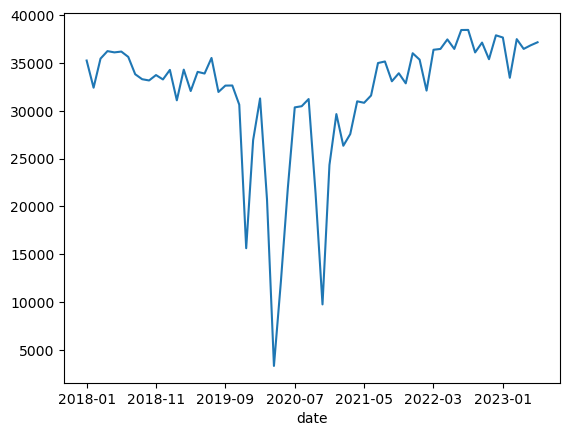

In [136]:
df_base.groupby("date")["nb_train_prevu"].sum().plot()

Il y a une claire influence du Covid sur le traffic : afin de différencier cette période anormale du reste, il convient d'ajouter une nouvelle colonne binaire qui vaut 1 lors de mois de confinement et 0 sinon. Une autre option plus évoluée aurait été d'utiliser le "stringency index" qui évalue l'intensité (entre 0 et 1) du Covid par pays basé sur de nombreux critères (nombre de malades, ouverture des espaces publics, droit de circulation...).

### 1.3 Répartition géographique des retards moyens par ligne pour tous les trains
Deux cartes qui représentent le retard moyen des trains partant d'une station ou arrivant à une station (utilisation d'un code couleur pour illustrer ce retard moyen)

In [138]:
# Add geo features
# https://medium.com/@amorrison_58444/geocoding-with-the-openstreetmap-api-and-geopy-325633980a15
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="adrico")

def get_coordinates(station_names):
    station_coords = {}
    for station_name in station_names:
        # city_name = station_name.split(" ")[0]
        if station_name in station_coords.keys():
            break
        location_variable = geolocator.geocode(f"{station_name}, France", limit=1, exactly_one=False) # problème avec le pays...
        # print(location_variable)
        for info in location_variable:
            lat = info.raw["lat"]
            lon = info.raw["lon"]
            station_coords[station_name] = (lat, lon)
    return station_coords

station_names = sorted(list(set(list(df_base.gare_depart.unique()) + list(df_base.gare_arrivee.unique()))))
station_coords = get_coordinates(station_names)

for station_type in ["depart", "arrivee"]:
    df_base[f"geo_infos_{station_type}"] = df_base[f"gare_{station_type}"].apply(lambda x:station_coords[x])

: 

In [ ]:
# https://medium.com/datasciencearth/map-visualization-with-folium-d1403771717

import folium

colors = ["green", "yellow", "orange", "red", "black"]
max_delay = max(df_delay_train.retard_moyen_tous_trains_arrivee)
for station_type in ["depart", "arrivee"]:
    sncf_map = folium.Map(location=[47,2], zoom_start=5, tiles="cartodb positron")
    df_delay_train_map = pd.DataFrame(df_base.groupby([f"gare_{station_type}", "geo_infos_depart", "geo_infos_arrivee"])["retard_moyen_tous_trains_arrivee"].mean()).reset_index(level=[0,1,2]).copy(deep=True)

    for idx, row in df_delay_train_map.iterrows():
        line_coords = []
        geo_col_name = f"geo_infos_{station_type}"
        station_col_name = f"gare_{station_type}"
        lat, lon = row[geo_col_name]
        line_coords.append((lat, lon))
        station = row[station_col_name]
        color = colors[max(0,int(len(colors)*row["retard_moyen_tous_trains_arrivee"]/max_delay)-1)]
        folium.Marker(location=[lat,lon], popup = station, icon=folium.Icon(color=color)).add_to(sncf_map)
        # FOR SOME REASON, POLYLINE CRASHES THE KERNEL...
        # folium.PolyLine(line_coords,
        #                 color=colors[int(len(colors)*row["retard_moyen_tous_trains_arrivee"]/max_delay)],
        #                 weight=15,
        #                 opacity=0.8).add_to(train_map)
    sncf_map.save(f"train_map_{station_type}.html")

## Etape 2 : Préprocessing des données

### 2.1 Sélection des colonnes d'intérêt et premiers ajouts de feature engineering (séparation de la date, ajout du booléen Covid)

In [137]:
columns = df_base.columns.to_list()
num_cols = ["annee", "mois", "duree_moyenne", "nb_train_prevu", "retard_moyen_tous_trains_arrivee"]
cat_cols = ["service", "gare_depart", "gare_arrivee"]
covid_months = ["2020-03", "2020-04", "2020-05", "2020-11", "2020-12", "2021-04"]

df_delay = df_base[columns[:6] + ["retard_moyen_tous_trains_arrivee"]].copy(deep=True)
df_delay[['annee', 'mois']] = df_delay['date'].str.split('-', n=1, expand=True)
df_delay.annee = pd.to_numeric(df_delay.annee)
df_delay.mois = pd.to_numeric(df_delay.mois)
df_delay["covid"] = df_delay["date"].apply(lambda x:1 if x in covid_months else 0)
df_delay.drop(['date'], axis=1, inplace=True)
df_delay.drop_duplicates(inplace=True)

df_delay.describe(include="all")

,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,retard_moyen_tous_trains_arrivee,annee,mois,covid
count,8154,8154,8154,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000
unique,2,59,59,NaN,NaN,NaN,NaN,NaN,NaN
top,National,PARIS LYON,PARIS LYON,NaN,NaN,NaN,NaN,NaN,NaN
freq,7142,1649,1649,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,169.860314,257.198308,5.668612,2020.240986,6.236326,0.089895
std,NaN,NaN,NaN,87.390774,173.815703,7.971691,1.608478,3.441466,0.286048
min,NaN,NaN,NaN,0.000000,0.000000,-472.638889,2018.000000,1.000000,0.000000
25%,NaN,NaN,NaN,100.000000,142.000000,3.129384,2019.000000,3.000000,0.000000
50%,NaN,NaN,NaN,164.000000,221.000000,4.962422,2020.000000,6.000000,0.000000
75%,NaN,NaN,NaN,221.000000,333.000000,7.673542,2022.000000,9.000000,0.000000


### 2.2 Gestion des outliers
Remarque : Il n'y a aucune valeur manquante donc on peut sauter l'étape de l'imputation des valeurs manquantes

In [75]:
# valeur min de -472.638889 pour retard_moyen_tous_trains_arrivee...
# sns.histplot(df_delay_train['retard_moyen_tous_trains_arrivee'])
# df_delay_train.sort_values(by=["retard_moyen_tous_trains_arrivee"], ascending=True)

# Méthode de Tuckey pour les outliers

def smooth_outliers(val, outlier_step, Q1, Q3):
    if val < Q1-outlier_step:
        val = Q1-outlier_step
    elif val > Q3+outlier_step:
        val = Q3+outlier_step
    return val

def clean_outliers(df, outlier_cols):
    # df = input_df.copy(deep=True)
    for col_name in outlier_cols:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col_name], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col_name],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        df[col_name] = df[col_name].apply(lambda x: smooth_outliers(x, outlier_step, Q1, Q3))
    return df

# df_delay_train.describe(include="all")

In [9]:
# CREATE = FEATURE ENGINEERING

# Simple binary ohe for the "service" feature
# for df in [df_delay_train, df_delay_test]:
#     df.service = df.service.apply(lambda x: 0 if x == "National" else 1)

In [10]:
# For the "gare_depart" and "gare_arrivee" features:
# Applying simple OHE will give way to many sparse features (more than 100...)
# https://annahava.medium.com/too-many-categories-how-to-deal-with-categorical-features-of-high-cardinality-d4563cfe62d6

# We need to find a way to group these features : clusters !
# - groupe train stations by magnitude of the associated city ?
# - by vague geographic location ?
# - merge both features into one and then applying some clustering ?
# - ...

### 2.3 Feature Engineering
Par ligne de train : 
- Ajout du retard moyen passé
- Ajout des retards moyens des mois n-1, n-2 et n-3

Par ailleurs, afin de conserver quelques informations géograhiques, si le train part/arrive dans un pays qui n'est pas la France, on note le nom du pays. On aurait aussi pu regrouper les stations par ligne de TGV...

In [11]:
# Add the average delay for the train line
# On ne prend que en compte les trajets passés !!!

def add_past_avg_delay(df):

    df["retards_moy_arrivee_trajet_passés"] = 0.0

    for i, row in df.iterrows():
        gare_depart, gare_arrivee = row["gare_depart"], row["gare_arrivee"]
        if i>1:
            mean_delay_series = df[:i-1].loc[(df.gare_depart == gare_depart) & (df.gare_arrivee == gare_arrivee),"retard_moyen_tous_trains_arrivee"]
            # print(mean_delay)
            if mean_delay_series.empty:
                # on prend la même valeur pour la première occurence de chaque trajet
                df.loc[i, "retards_moy_arrivee_trajet_passés"] = row["retard_moyen_tous_trains_arrivee"]
            else:
                mean_delay =  mean_delay_series.mean()
                df.loc[i, "retards_moy_arrivee_trajet_passés"] = mean_delay
        else:
            # on prend la même valeur pour la première occurence de chaque trajet (qui est aussi la première ligne du df dans ce cas)
            df.loc[i, "retards_moy_arrivee_trajet_passés"] = row["retard_moyen_tous_trains_arrivee"]

    return df

In [13]:
# On ajoute les retards de chacun des trois mois précédents (doit-on enlever les 3 premiers mois du dataset du coup ?)

def add_delays_previous_months(df, n_months):
    past_month_cols = [f"retards_moys_mois_n-{i}" for i in range(1, n_months+1)]
    for col in past_month_cols:
        df[col] = 0.0
    for i,row in df.iterrows():
        if i%500 == 0:
            print(i)
        annee, mois = row["annee"], row["mois"]
        gare_depart, gare_arrivee = row["gare_depart"], row["gare_arrivee"]
        for j, col_name in enumerate(past_month_cols):
            n_mois_a_soustraire = j+1
            date_mois_prec = (annee, mois-n_mois_a_soustraire) if mois>=n_mois_a_soustraire+1 else ((annee-1, 12+mois-n_mois_a_soustraire) if annee>=2019 else (annee, mois))
            # print((annee, mois), n_mois_a_soustraire, date_mois_prec)
            series = df.loc[(df.gare_depart == gare_depart) & (df.gare_arrivee == gare_arrivee) & (df.annee == date_mois_prec[0]) & (df.mois == date_mois_prec[1]), "retard_moyen_tous_trains_arrivee"]
            # print(series)
            if not series.empty:
                value = series.values[0]
                # print(value)
                df.loc[i, col_name] = value
            else:
                # un peu brutal de prendre la moyenne totale direct : on pourrait essayer le mois d'avant encore ou l'année d'avant...
                df.loc[i, col_name] = row["retards_moy_arrivee_trajet_passés"]
    return df

In [14]:
# Ajout des pays
# df_delay_train[["gare_depart", "gare_arrivee"]].value_counts().to_csv("test.csv")
gare_to_pays = {"GENEVE":"Suisse", "ZURICH":"Suisse", "ITALIE":"Italie", "LAUSANNE":"Suisse", "BARCELONA":"Espagne", "MADRID":"Espagne", "STUTTGART":"Allemagne", "FRANCFORT":"Allemagne"}

def add_countries(df, gare_to_pays):
    df["pays"] = df.apply(lambda row: gare_to_pays.get(row["gare_depart"], gare_to_pays.get(row["gare_arrivee"], "France")), axis=1)
    return df

# def add_summer(df):
#     df["summer"] = df["mois"].apply(lambda x: x in [6, 7, 8])
#     return df

### 2.4 Conversion des données
Dernière étape qui consiste à scale les données numériques et encoder (one-hot) les données catégorielles

In [19]:
# CONVERT

def convert_dataframes(df, drop_cols, dummy_cols, numeric_scale_cols, scaler, train=True):
    df = df.drop(drop_cols, axis=1, inplace=False)
    df = pd.get_dummies(df, prefix=["mois", "pays"], columns=dummy_cols, drop_first=True)
    if train:
        df[numeric_scale_cols] = scaler.fit_transform(df[numeric_scale_cols])
    else:
        df[numeric_scale_cols] = scaler.transform(df[numeric_scale_cols])
    return df, scaler

### 2.5 Application de toute la pipeline à nos données
Attention à bien appliquer le train-test-splt afin d'éviter tout "data leakage"

In [73]:
# Full Data Preprocessing pipeline

# TRAIN-TEST SPLIT
def train_test_split(df):
    return df.loc[df.annee < 2023], df.loc[df.annee == 2023]
df_delay_train, df_delay_test = train_test_split(df_delay)

# MISSING VALUES
print(f"Train df : {df_delay_train.isna().sum().sum() == 0}") # no missing values
print(f"Test df : {df_delay_test.isna().sum().sum() == 0}") # no missing values

# OUTLIERS
print("Dealing with outliers")
outlier_cols = ["duree_moyenne", "nb_train_prevu"]
print("   Train")
df_delay_train = clean_outliers(df_delay_train, outlier_cols)
# print("   Test")
# df_delay_test = clean_outliers(df_delay_test)

# FEATURE ENGINEERING
print("Feature engineering")
full_delay_df = pd.concat([df_delay_train, df_delay_test])
# print("   Add summer bool")
# full_delay_df = add_summer(full_delay_df)
print("   Adding average delays of all previous months")
full_delay_df = add_past_avg_delay(full_delay_df)
n_months = 3
print(f"   Adding delays of {n_months} previous months")
full_delay_df = add_delays_previous_months(full_delay_df, n_months)
print("   Adding country info")
gare_to_pays = {"GENEVE":"Suisse", "ZURICH":"Suisse", "ITALIE":"Italie", "LAUSANNE":"Suisse", "BARCELONA":"Espagne", "MADRID":"Espagne", "STUTTGART":"Allemagne", "FRANCFORT":"Allemagne"}
full_delay_df = add_countries(full_delay_df, gare_to_pays)

# CONVERT
print("Dataframe conversions")
drop_cols = ["service", "gare_depart", "gare_arrivee", "annee"]
dummy_cols = ["mois", "pays"]
target_col = ["retard_moyen_tous_trains_arrivee"]
numeric_scale_cols = [col for col in df_delay_train.columns if col not in drop_cols + dummy_cols + target_col]

df_delay_train_clean, df_delay_test_clean = train_test_split(full_delay_df)

scaler = MinMaxScaler()
print("   Train")
df_delay_train_clean, fitted_scaler = convert_dataframes(df_delay_train_clean, drop_cols, dummy_cols, numeric_scale_cols, scaler, train=True)
print("   Test")
df_delay_test_clean, fitted_scaler = convert_dataframes(df_delay_test_clean, drop_cols, dummy_cols, numeric_scale_cols, fitted_scaler, train=False)
df_delay_test_clean = df_delay_test_clean.reindex(columns = df_delay_train_clean.columns, fill_value=0) # add zeros for the ohe months of the train set

# X and y splits
print("Splitting into X and y")
df_delay_train_clean_X, df_delay_train_clean_y = df_delay_train_clean.drop(target_col, axis=1, inplace=False), pd.DataFrame(df_delay_train_clean[target_col[0]])
df_delay_test_clean_X, df_delay_test_clean_y = df_delay_test_clean.drop(target_col, axis=1, inplace=False), pd.DataFrame(df_delay_test_clean[target_col[0]])

service                                     National
gare_depart                                TOURCOING
gare_arrivee                        BORDEAUX ST JEAN
duree_moyenne                                    295
nb_train_prevu                                    31
retard_moyen_tous_trains_arrivee           15.760119
annee                                           2023
mois                                               1
Name: 7497, dtype: object
Train df : True
Test df : True
Dealing with outliers
   Train
   Test
service                                     National
gare_depart                                TOURCOING
gare_arrivee                        BORDEAUX ST JEAN
duree_moyenne                                  295.0
nb_train_prevu                                  31.0
retard_moyen_tous_trains_arrivee           15.686069
annee                                           2023
mois                                               1
Name: 7497, dtype: object
Feature engineering
   Adding 

### 2.6 : Retour sur l'exploration des données 
On ajoute les nouvelles colonnes à l'analyse pour établir les corrélations (sous forme de heatmap par soucis de visualisation)

In [23]:
# Add heatmaps of the dataframe's correlation matrix
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

plt.figure(figsize=(25, 15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':30}, pad=12)
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
# plt.savefig('full_heatmap.png', dpi=300, bbox_inches='tight')

In [24]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[target_col].sort_values(by=target_col[0], ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title(f'Features Correlating with {target_col[0]}', fontdict={'fontsize':18}, pad=16)
# plt.savefig('target_heatmap.png', dpi=300, bbox_inches='tight')

Quick description :
- Very high influence of the delays in the past months and the average past delays for each TGV line !
- Not much influence of months except for July (only keep this one ?)
- This seems promising since we only use past (known) values to construct our features => easily replicable to the test set !
- Apart from France and Italy, country info does not seem to add much...

Ideas : 
- Maybe try with even more past months (currently we only look at the last 3) : should we only start training after start_date + n_past_months or can we still use this portion of the data ? Look for some tradeoff !
- Maybe we could try to add more geographical insights to the data regarding the TGV path ? Like maybe the line (I tried with the new csv but not very useful since lines are too short...) or even the region for French cities (based on geo coordinates computed above) ? Or maybe the data from the previous months is enough ?

Next steps : 
- A bit more EDA (see Notion page)
- Start applying regression models to our dataset  (based on previous experience, I am pretty sure ensemble methods like Random Forest will perform particularely well on this kind of data !)


## 3 : Application de modèles pour la tâche de régression

### 3.1 Evaluation de quelques modèles non-finetunés sur le TRAIN SET

In [25]:
# BASIC EVLUATION OF REGRESSION MODELS ON TRAIN SET

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute

from sklearn.dummy import DummyRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

def basic_train_set_eval(model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, df_delay_train_clean_X, df_delay_train_clean_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    scores = absolute(scores)
    print(f'Model name : {type(model).__name__} -- Mean MAE on TRAIN SET: {scores.mean():.3f} ({scores.std():.3f})')

models = [DummyRegressor(strategy='mean'), XGBRegressor(), RandomForestRegressor()]

for model in models:
    basic_train_set_eval(model)

Model name : DummyRegressor -- Mean MAE on TRAIN SET: 2.815 (0.067)
Model name : XGBRegressor -- Mean MAE on TRAIN SET: 1.829 (0.052)
Model name : RandomForestRegressor -- Mean MAE on TRAIN SET: 1.793 (0.056)


### 3.2 Evaluation de quelques modèles finetunés sur le TEST SET

In [74]:
from sklearn.metrics import mean_absolute_error

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features).reshape(len(test_labels), 1)
    mae = mean_absolute_error(test_labels, predictions)
    print('Mean Absolute Error on TEST SET: {:0.4f}.'.format(mae))
    
    return mae

In [30]:
from pprint import pprint
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingRandomSearchCV
# from sklearn.model_selection import RandomizedSearchCV


xgb = XGBRegressor()
# pprint(xgb.get_params())
xgb_random_grid = {
    "n_estimators":[int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)],
    "max_depth":list(range(1, 11)),
    "eta":[0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.8, 1],
    "colsample_bytree":[0.5, 0.8, 1]
}

rf = RandomForestRegressor(random_state = 42)

rf_random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf':  [1, 2, 4]
}

model_inits = [(xgb, xgb_random_grid), (rf, rf_random_grid)]

def tune_hyperparams(model_init):
    model, param_grid = model_init
    model_name = type(model).__name__
    print(f"HYPERPARAMETER TUNING FOR {type(model).__name__}")
    model_random = HalvingRandomSearchCV(estimator = xgb, scoring = "neg_mean_absolute_error" , param_distributions = param_grid, n_candidates = "exhaust", cv = 5, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    model_random.fit(df_delay_train_clean_X, df_delay_train_clean_y)
    pprint(model_random.best_params_)

    best_random_model = model_random.best_estimator_
    random_mae = evaluate(best_random_model, df_delay_test_clean_X, df_delay_test_clean_y)
    print(f'Model name : {model_name} -- Mean MAE on TEST SET: {random_mae:.3f}')
    return model_name, best_random_model, random_mae

best_models = {}
for model_init in model_inits:
    model_name, best_random_model, random_mae = tune_hyperparams(model_init)
    best_models[model_name] = (best_random_model, random_mae)
    
sorted_best_models = {k: v for k, v in sorted(best_models.items(), key=lambda item: item[1][1])}
print(sorted_best_models)

HYPERPARAMETER TUNING FOR XGBRegressor
n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 10
max_resources_: 7428
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 742
n_resources: 10
Fitting 5 folds for each of 742 candidates, totalling 3710 fits
----------
iter: 1
n_candidates: 248
n_resources: 30
Fitting 5 folds for each of 248 candidates, totalling 1240 fits
----------
iter: 2
n_candidates: 83
n_resources: 90
Fitting 5 folds for each of 83 candidates, totalling 415 fits
----------
iter: 3
n_candidates: 28
n_resources: 270
Fitting 5 folds for each of 28 candidates, totalling 140 fits
----------
iter: 4
n_candidates: 10
n_resources: 810
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 5
n_candidates: 4
n_resources: 2430
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 6
n_candidates: 2
n_resources: 7290
Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'colsample_

### Eventuel GridSearch

In [ ]:
# from sklearn.model_selection import GridSearchCV
# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [20, 30, 40],
#     'max_features': ["sqrt"],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [2, 3, 5],
#     'n_estimators': [200, 400, 600]
# }
# # Create a based model
# rf = RandomForestRegressor()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# # Fit the grid search to the data
# grid_search.fit(df_delay_train_clean_X, df_delay_train_clean_y)
# print(grid_search.best_params_)

# best_grid = grid_search.best_estimator_
# grid_accuracy = evaluate(best_grid, df_delay_test_clean_X, df_delay_test_clean_y)

# print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 200}
Model Performance
Root Mean Square Error: 2.7251.
Improvement of -95.38%.


### 3.3 Affichage des prédictions du meilleur modèle

In [45]:
best_model = list(sorted_best_models.values())[0][0]
predictions = best_model.predict(df_delay_test_clean_X)
df_predict = df_delay.loc[df_delay.annee == 2023].copy(deep=True)
df_predict["predictions"] = predictions
df_predict["abs_errors"] = abs(df_predict["predictions"] - df_predict["retard_moyen_tous_trains_arrivee"])
print(df_predict["abs_errors"].mean())
print(evaluate(best_model, df_delay_test_clean_X, df_delay_test_clean_y))
df_predict

2.113580423040189
      retard_moyen_tous_trains_arrivee
7428                         13.333464
7429                          7.943927
7430                          6.065343
7431                          9.004088
7432                          9.226940
...                                ...
8149                          7.689898
8150                         14.824264
8151                          8.650349
8152                         12.765753
8153                          7.251702

[726 rows x 1 columns]
Mean Absolute Error on TEST SET: 2.0657.
2.0656943971060757


,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,retard_moyen_tous_trains_arrivee,annee,mois,predictions,abs_errors
7428,International,PARIS EST,STUTTGART,189,150,13.333464,2023,1,8.971004,4.362460
7429,International,PARIS LYON,ZURICH,247,129,7.943927,2023,1,6.590643,1.353283
7430,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,140,1075,6.065343,2023,1,6.254492,0.189149
7431,National,CHAMBERY CHALLES LES EAUX,PARIS LYON,180,334,9.004088,2023,1,7.605114,1.398975
7432,National,MACON LOCHE,PARIS LYON,99,252,9.226940,2023,1,7.995272,1.231667
...,...,...,...,...,...,...,...,...,...,...
8149,National,STRASBOURG,PARIS EST,114,492,7.689898,2023,6,7.424993,0.264905
8150,National,TOULOUSE MATABIAU,PARIS MONTPARNASSE,273,215,14.824264,2023,6,10.087167,4.737097
8151,National,TOURS,PARIS MONTPARNASSE,78,192,8.650349,2023,6,3.587764,5.062585
8152,National,VALENCE ALIXAN TGV,PARIS LYON,133,440,12.765753,2023,6,9.045099,3.720654


In [ ]:
prediction_analysis_df = df_predict.groupby(by=["gare_depart", "gare_arrivee"])[["nb_train_prevu", "duree_moyenne", "retard_moyen_tous_trains_arrivee", "abs_errors"]].mean().sort_values(by="abs_errors")
prediction_analysis_df

Text(0.5, 1.0, 'Correlation Heatmap for Predictions Analysis')

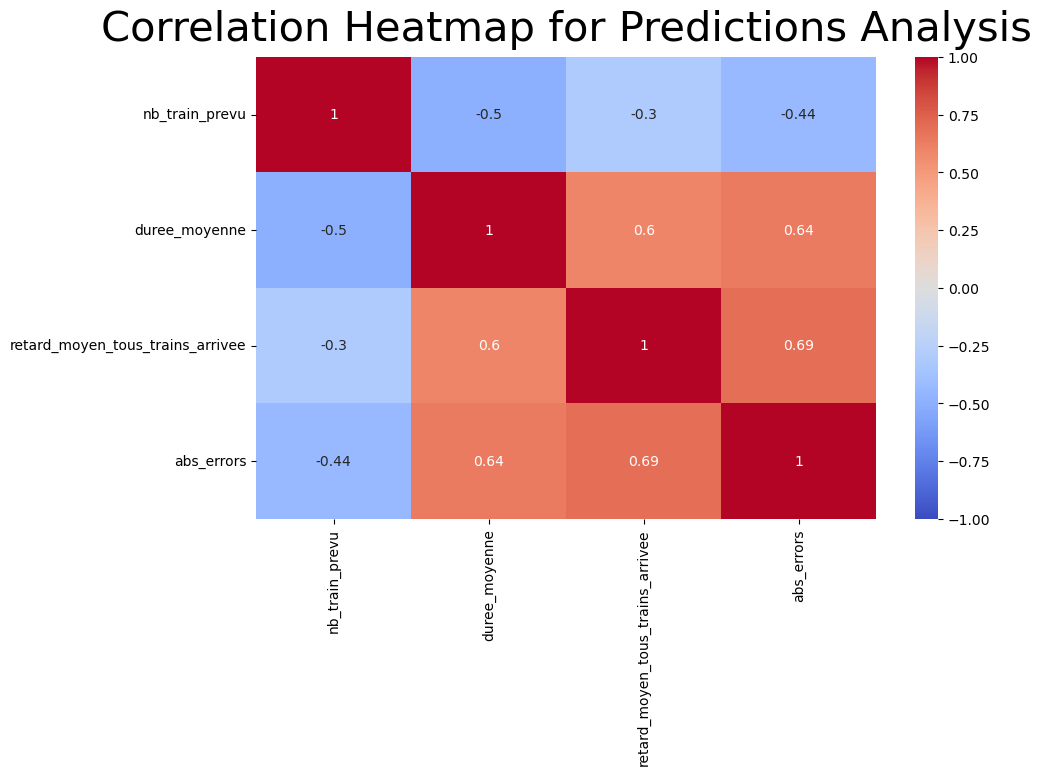

In [ ]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(prediction_analysis_df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap for Predictions Analysis', fontdict={'fontsize':30}, pad=12)

<Axes: xlabel='mois'>

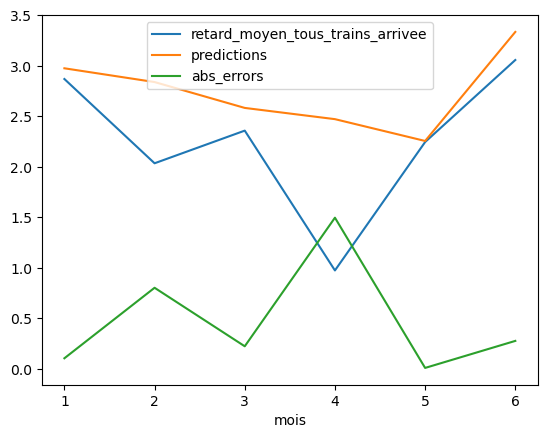

In [ ]:
df_predict.loc[(df_predict.gare_depart == "REIMS") & (df_predict.gare_arrivee == "PARIS EST")][["mois", "retard_moyen_tous_trains_arrivee", "predictions", "abs_errors"]].plot(x="mois")
# df_predict.loc[(df_predict.gare_depart == "ITALIE") & (df_predict.gare_arrivee == "PARIS LYON")][["mois", "retard_moyen_tous_trains_arrivee", "predictions", "abs_errors"]].plot(x="mois")